In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
data = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [7]:
data=data.drop(["Date", "Evaporation", "Sunshine", "Cloud9am", "Cloud3pm", "Location"], axis=1)
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [8]:
data.shape

(145460, 17)

In [9]:
data=data.dropna(axis=0)
data.shape

(112925, 17)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

In [12]:
x=data.drop(["RainTomorrow"], axis=1)
y=data["RainTomorrow"]

In [13]:
x.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0


<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

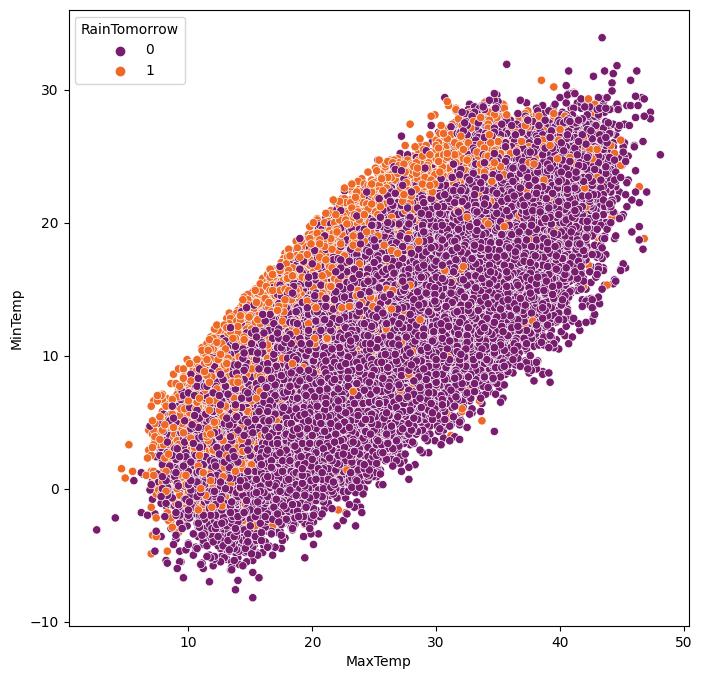

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow' , palette = 'inferno',data = data)

<Axes: >

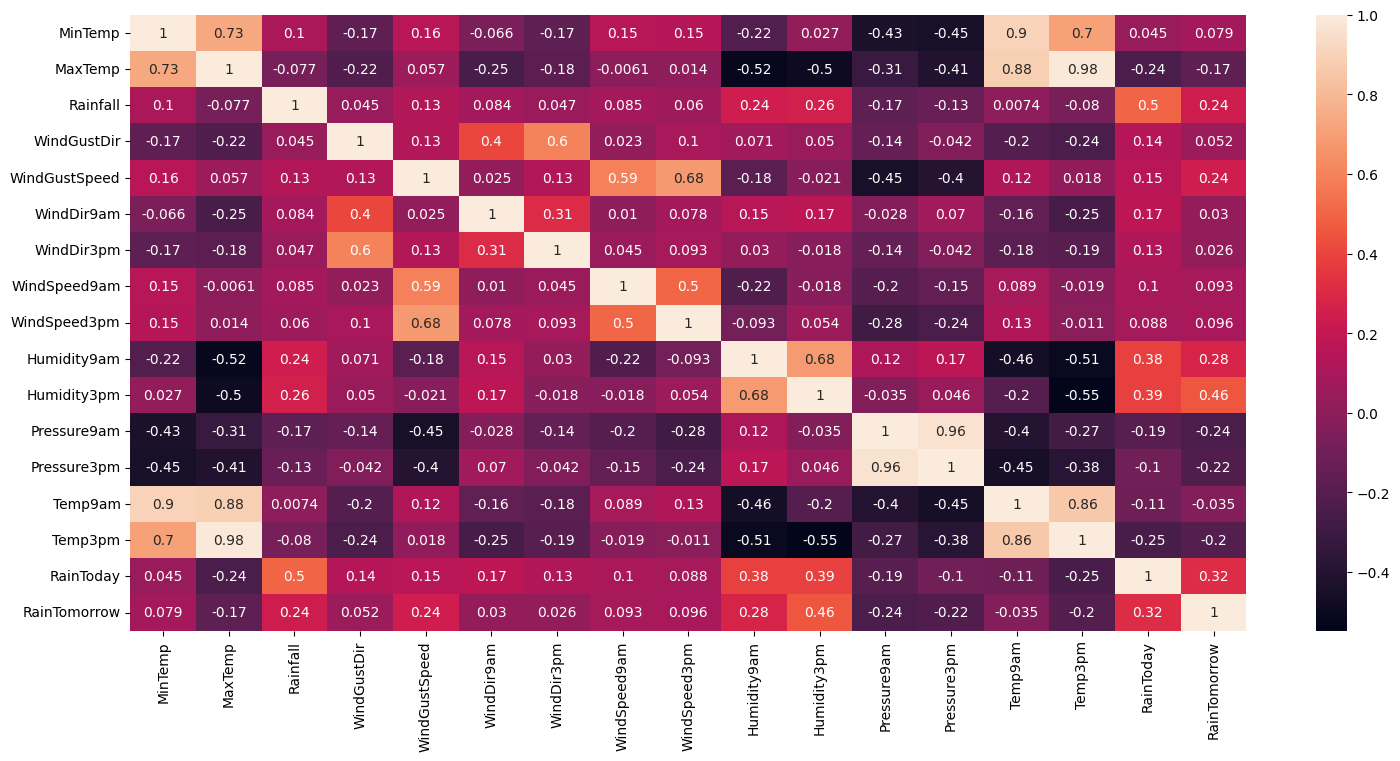

In [20]:
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(),annot=True)

In [21]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x, y , test_size=0.2, random_state=42)
print("x train size: ",x_train.shape)
print("x test size: ",x_test.shape)
print("y train size: ",y_train.shape)
print("y test size: ",y_test.shape)

x train size:  (90340, 16)
x test size:  (22585, 16)
y train size:  (90340,)
y test size:  (22585,)


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lb=LogisticRegression()
lb.fit(x_train, y_train)
pred=lb.predict(x_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
print("Accuracy score: ",accuracy_score(pred,y_test))
print("\n\n Confusion matrix: \n",confusion_matrix(pred, y_test))
print("\n\n\n classification report: \n",classification_report(pred,y_test))

Accuracy score:  0.844941332742971


 Confusion matrix: 
 [[16675  2653]
 [  849  2408]]



 classification report: 
               precision    recall  f1-score   support

           0       0.95      0.86      0.90     19328
           1       0.48      0.74      0.58      3257

    accuracy                           0.84     22585
   macro avg       0.71      0.80      0.74     22585
weighted avg       0.88      0.84      0.86     22585



In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [36]:
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred))
print("\n\n classification report: ",classification_report(y_test, pred))
print("\n\n confusion matrix:  \n",confusion_matrix(y_test,pred))

Accuracy score:  0.786584015939783


 classification report:                precision    recall  f1-score   support

           0       0.87      0.86      0.86     17524
           1       0.52      0.54      0.53      5061

    accuracy                           0.79     22585
   macro avg       0.69      0.70      0.70     22585
weighted avg       0.79      0.79      0.79     22585



 confusion matrix:  
 [[15048  2476]
 [ 2344  2717]]


In [37]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [40]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy score: ",accuracy_score(pred, y_test))
print("\n\n confusion matrix:  ",confusion_matrix(pred, y_test))
print("\n\n classification report:  ",classification_report(pred, y_test))

Accuracy score:  0.8575603276510959


 confusion matrix:   [[16753  2446]
 [  771  2615]]


 classification report:                 precision    recall  f1-score   support

           0       0.96      0.87      0.91     19199
           1       0.52      0.77      0.62      3386

    accuracy                           0.86     22585
   macro avg       0.74      0.82      0.77     22585
weighted avg       0.89      0.86      0.87     22585



In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()

In [43]:
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("Accuarcy score: ",accuracy_score(y_test, pred))
print("\n\nConfusion matrix: \n\n",confusion_matrix(y_test,pred))
print("\n\nClassificaiton report: \n\n ",classification_report(y_test,pred))

Accuarcy score:  0.8515386318352889


Confusion matrix: 

 [[16661   863]
 [ 2490  2571]]


Classificaiton report: 

                precision    recall  f1-score   support

           0       0.87      0.95      0.91     17524
           1       0.75      0.51      0.61      5061

    accuracy                           0.85     22585
   macro avg       0.81      0.73      0.76     22585
weighted avg       0.84      0.85      0.84     22585



In [51]:
import xgboost as xgb

In [55]:
# Example: Using XGBoost for classification
model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
model.fit(x_train, y_train)

pred=model.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test, pred))
print("\n\n classification report:\n\n  ",classification_report(y_test,pred))
print("\n\n confusion matrix:\n\n",confusion_matrix(y_test,pred))

Accuracy score:  0.8553021917201683


 classification report:

                 precision    recall  f1-score   support

           0       0.88      0.94      0.91     17524
           1       0.74      0.55      0.63      5061

    accuracy                           0.86     22585
   macro avg       0.81      0.75      0.77     22585
weighted avg       0.85      0.86      0.85     22585



 confusion matrix:

 [[16551   973]
 [ 2295  2766]]
